# Phase change formulation for water

In [1]:
import numpy as np
import matplotlib.pyplot as plt

import water


In [2]:
# tabulated from https://www.engineeringtoolbox.com/water-properties-d_1573.html
# units of kJ/mol
tab = [
    [350.0, 41.72],
    [400.0, 39.32],
    [500.0, 32.92],
    [600.0, 20.83]
]

tab = np.array(tab).T
tab[1] *= 1e3 / water.mmw

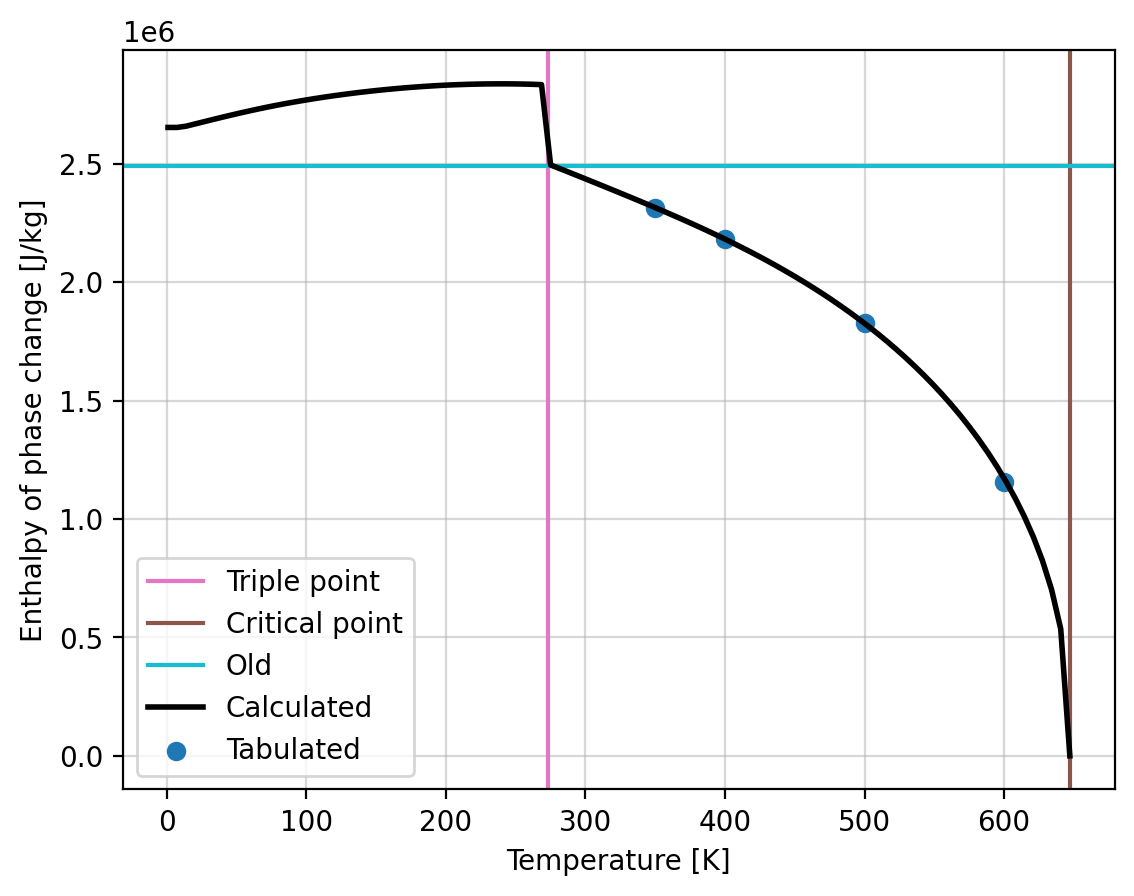

In [3]:
t_arr = np.linspace(1, water.T_crit, 100)
h_arr = [water.delta_both(t) for t in t_arr]

plt.close("all")

fig,ax = plt.subplots(1,1)

# markers 
ax.axvline(x=water.T_trip, label="Triple point", c='tab:pink')
ax.axvline(x=water.T_crit, label="Critical point", c="tab:brown")

# constant value adopted previously
ax.axhline(y=2.493000E+06, label="Old", c="tab:cyan")

# functional
ax.plot(t_arr, h_arr, label="Calculated", color='k', lw=2)

# tabulated
ax.scatter(tab[0], tab[1], label="Tabulated", zorder=1)

ax.set(xlabel="Temperature [K]", ylabel="Enthalpy of phase change [J/kg]", zorder=2)
ax.legend()
ax.grid(alpha=0.5)
ax.set_axisbelow(True)

plt.show()